In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 观察数据

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 统计数据属性缺少值
## 发现Cabin属性缺少过多

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 数据描述分析
## 数据描述：对数据整体的刻画

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 观察获救比例

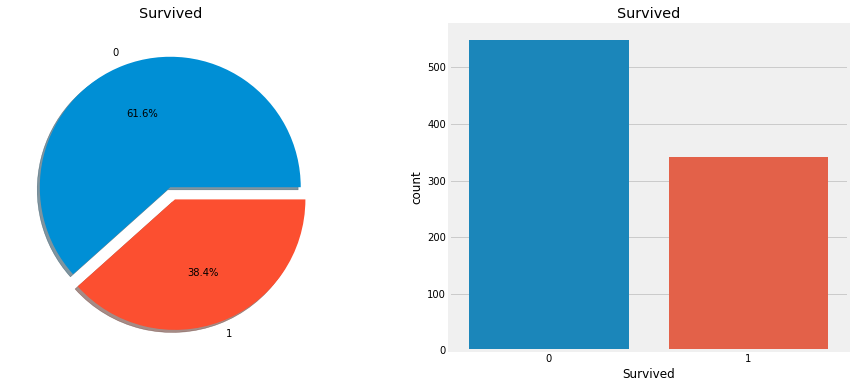

In [5]:
f,ax=plt.subplots(1,2,figsize=(14,6))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## 观察每个属性与获救的联系
### Sex
### 可以看出来整体上女性的获救率高

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

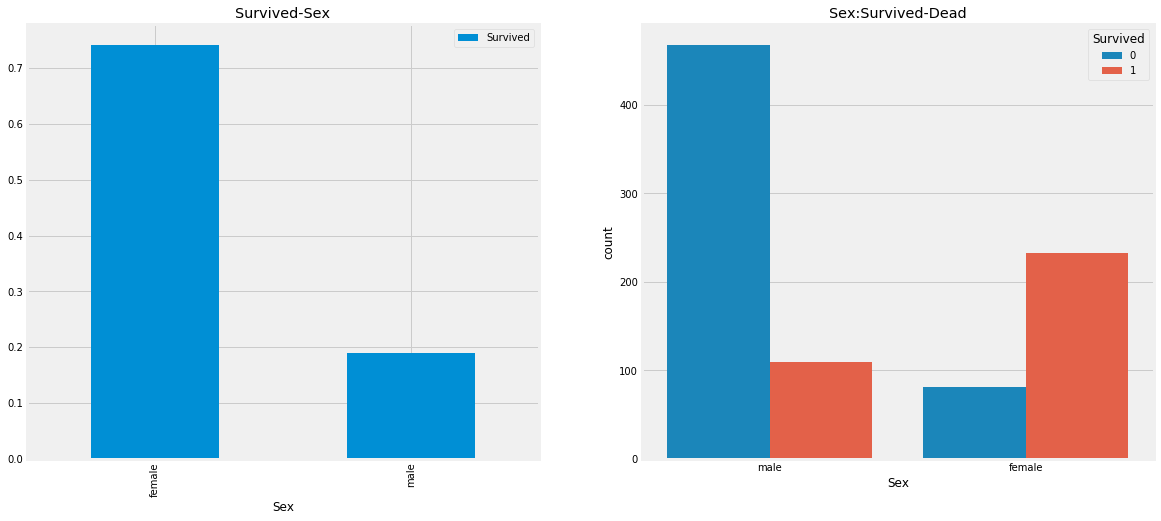

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived-Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived-Dead')
plt.show()

### 船舱等级Pclass

In [8]:
pd.crosstab(data.Pclass,data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


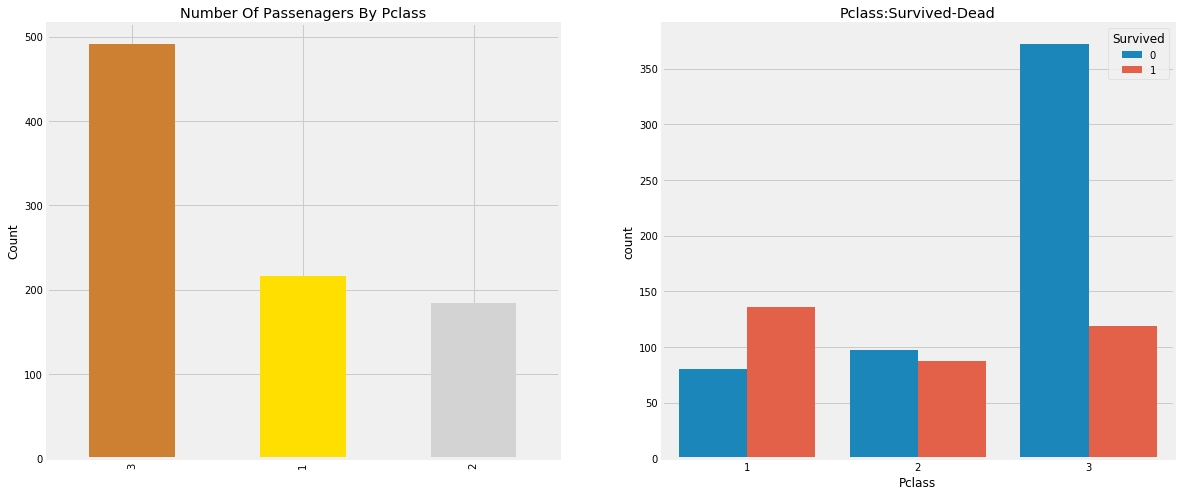

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passenagers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived-Dead')
plt.show()

### 年龄Age 

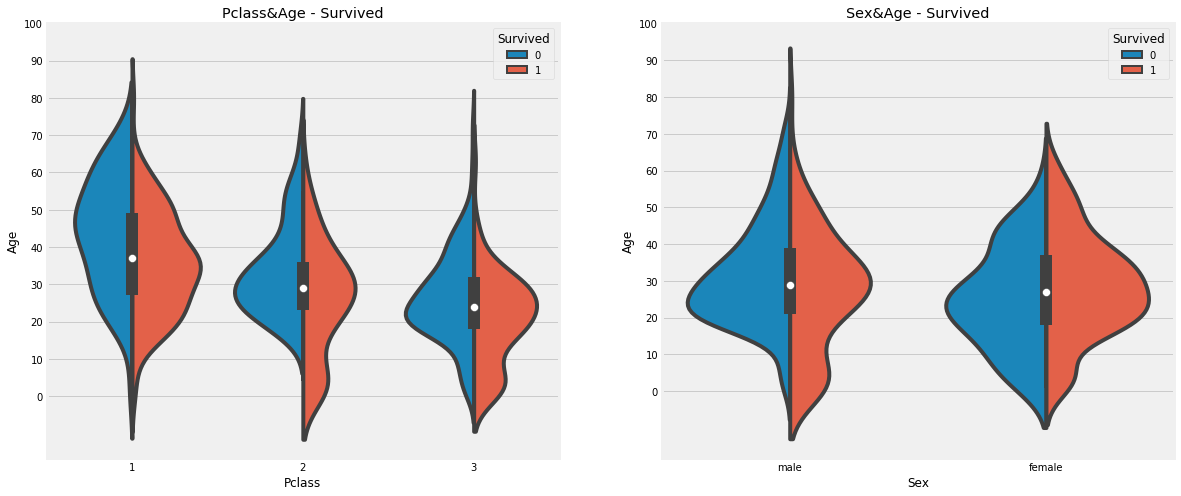

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass&Age - Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex&Age - Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Age存在缺失值
### 缺失值处理方法
* 平均值填充
* 经验值填充
* 回归预测
* 删除
### Age填充策略一：根据名字特征 

In [11]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [12]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                         'Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs',
                         'Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [13]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [14]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

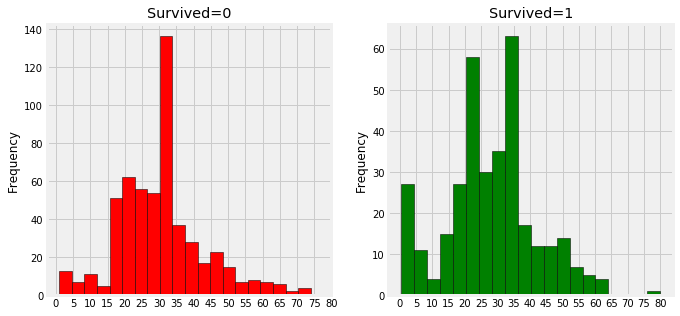

In [15]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### 港口Embarked 

In [16]:
pd.crosstab([data.Embarked,data.Pclass],
            [data.Sex,data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

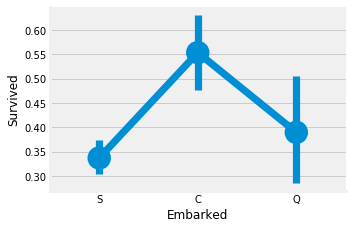

In [17]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

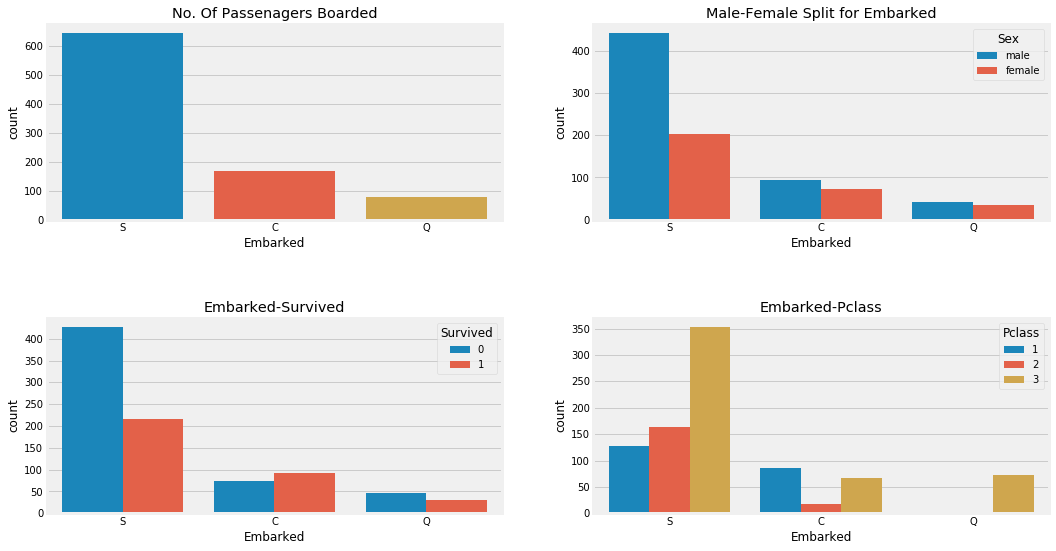

In [18]:
f,ax=plt.subplots(2,2,figsize=(16,9))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passenagers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked-Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked-Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### 考虑到S港口的人最多，可以直接用S填充缺失值

In [19]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

### SibSp  兄弟姐妹人数；Parch 父母与孩子 

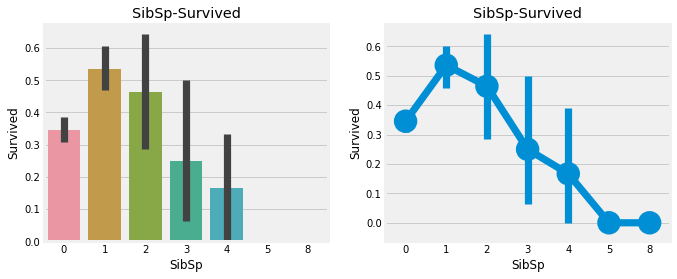

In [20]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp-Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp-Survived')
plt.close(2)
plt.show()

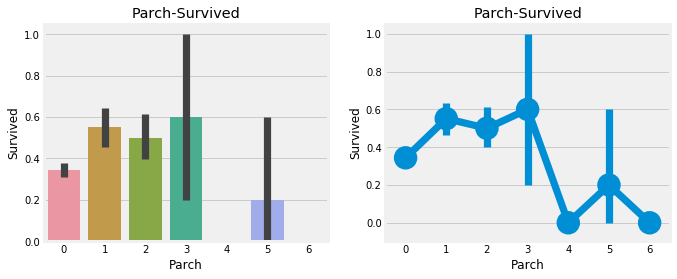

In [21]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch-Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch-Survived')
plt.close(2)
plt.show()

### 船票价格Fare

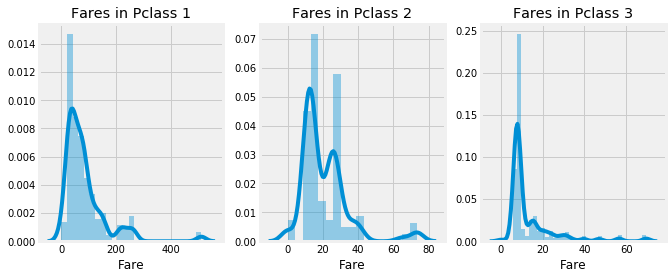

In [22]:
f,ax=plt.subplots(1,3,figsize=(10,4))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### 相关程度 

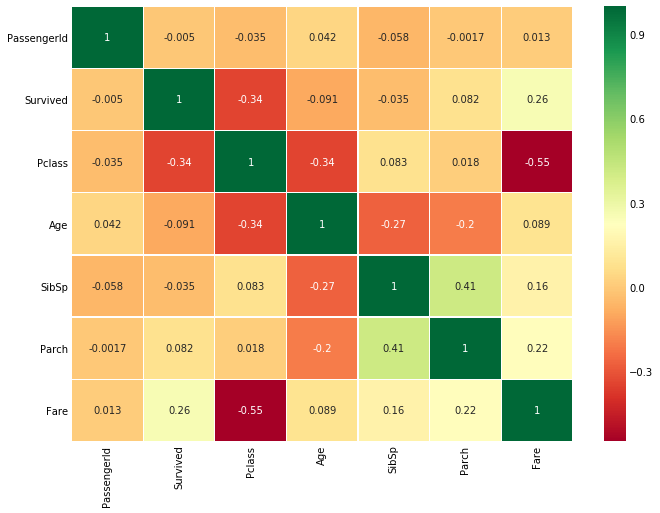

In [23]:
#corr--correlation matrix
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## 特征工程
### 将连续值离散化
- 年龄
- 船票价格

In [24]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


In [25]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


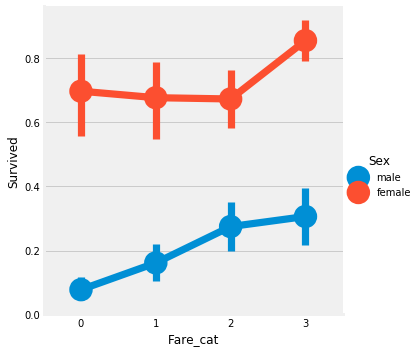

In [26]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

### 获救几率与Fare_cat的相关性十分明显

### 根据家庭成员数量SibSp和Parch构建新特征Family_size 

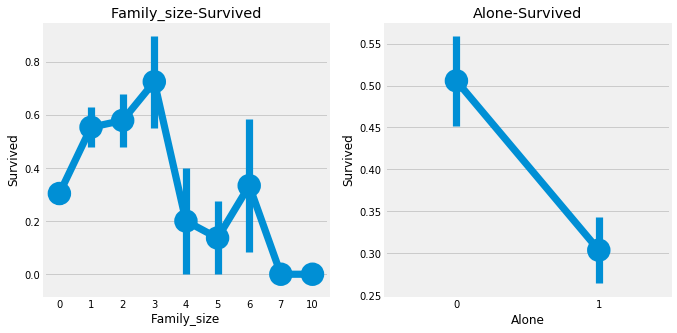

In [27]:
data['Family_size']=0
data['Family_size']=data['SibSp']+data['Parch']
data['Alone']=0
data.loc[data.Family_size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(10,5))
sns.factorplot('Family_size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_size-Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone-Survived')
plt.close(2)
plt.close(3)
plt.show()

### 将字符串映射成数字 

In [28]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### 去掉不必要的特征

In [29]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

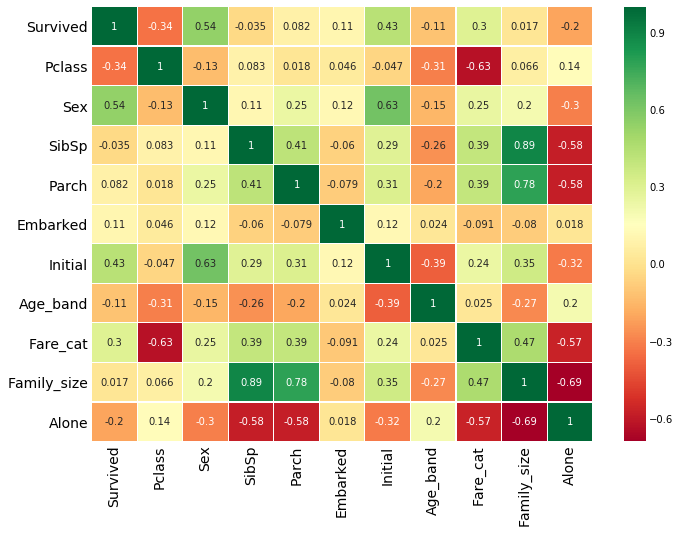

In [32]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 模型预测
### logistic回归
* 二分类

### 朴素贝叶斯
* 朴素：特征之间是相互独立的

### 随机森林
* 集成学习

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### 切分训练集与测试集

In [34]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]#[1:]不取第0列
train_Y=train[train.columns[:1]]#只取第0列
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

* Logistic Regression

In [36]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction01=model.predict(test_X)
print('Accuracy for Logistic Regression is ',
      metrics.accuracy_score(prediction01,test_Y))

Accuracy for Logistic Regression is  0.8171641791044776


* NaiveBayes 朴素贝叶斯

In [37]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction02=model.predict(test_X)
print('Accuracy for NaiveBayes is ',
      metrics.accuracy_score(prediction02,test_Y))

Accuracy for NaiveBayes is  0.8134328358208955


* 随机森林 

In [38]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction07=model.predict(test_X)
print('Accuracy for Random Forest is ',
      metrics.accuracy_score(prediction07,test_Y))

Accuracy for Random Forest is  0.8208955223880597


### 交叉验证

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
k_fold=KFold(n_splits=10,random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Naive Bayes','Random Forest']
models=[LogisticRegression(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model=i
    cv_result=cross_val_score(model,X,Y,cv=k_fold,scoring='accuracy')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV_Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2

,CV_Mean,Std
Logistic Regression,0.805843,0.021861
Naive Bayes,0.801386,0.028999
Random Forest,0.810375,0.031186


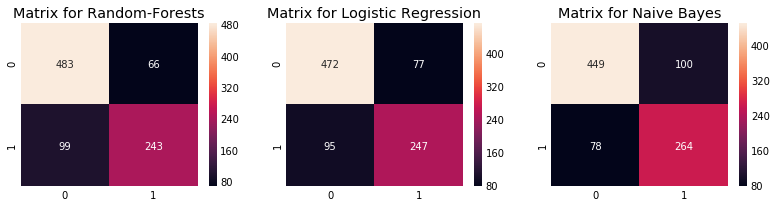

In [42]:
f,ax=plt.subplots(1,3,figsize=(12,3))
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1],annot=True,fmt='2.0f')
ax[1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2],annot=True,fmt='2.0f')
ax[2].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## 模型的特征重要性，评估特征 

Text(0.5, 1.0, 'Feature Importance in Random Forests')

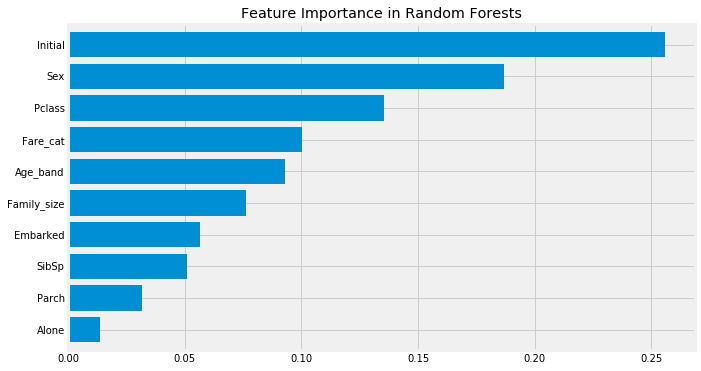

In [44]:
f,ax=plt.subplots(1,1,figsize=(10,6))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax)
ax.set_title('Feature Importance in Random Forests')